In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to get revenue estimates for multiple tickers
def get_revenue_estimates(tickers):
    revenue_data = []

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        try:
            # Get revenue estimates
            df = stock.revenue_estimate

            # Extract the first row and add ticker info
            if not df.empty:
                first_row = df.iloc[[0]].copy()
                first_row['Ticker'] = ticker
                revenue_data.append(first_row)
            else:
                print(f"No revenue estimate data available for ticker: {ticker}")

        except Exception as e:
            print(f"Error fetching data for ticker {ticker}: {str(e)}")

    # Combine all data into a single DataFrame
    combined_df = pd.concat(revenue_data, axis=0) if revenue_data else pd.DataFrame()
    
    return combined_df

In [2]:
# Example usage with multiple stocks (Dow 30 companies)
tickers = ["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"]
df = get_revenue_estimates(tickers)
df

C:\Users\nilee\AppData\Local\Temp\ipykernel_17100\1970892044.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(revenue_data, axis=0) if revenue_data else pd.DataFrame()


,numberOfAnalysts,avg,low,high,yearAgoRevenue,growth,Ticker
0q,5,75930000,67470000,99180000,86940000,-0.127,ASC
0q,0,0,0,0,None,NaN,AXR
0q,0,0,0,0,None,NaN,CHCI
0q,2,145890000,142000000,149790000,122130000,0.195,EGY
0q,7,30400000,27620000,31060000,23458000,0.296,GAMB
0q,1,7000000,7000000,7000000,NaN,NaN,IDR
0q,5,82700000,81000000,84500000,NaN,NaN,MDXG
0q,0,0,0,0,None,NaN,OPXS
0q,1,18440000,18440000,18440000,NaN,NaN,RDVT


In [3]:
def plot_growth_by_ticker(df):
    """
    This function plots the growth of different tickers using a bar chart.
    
    Parameters:
    df (DataFrame): A pandas DataFrame containing columns 'Ticker' and 'growth'.
    
    Returns:
    None
    """
    import matplotlib.pyplot as plt

    # Set the style
    plt.style.use('dark_background')
    fig, ax = plt.subplots()

    # Plot each Ticker with different colors
    for ticker in df['Ticker'].unique():
        ticker_data = df[df['Ticker'] == ticker]
        ax.bar(ticker, ticker_data['growth'], label=ticker)

    # Adding legend and labels
    ax.set_xlabel('Ticker')
    ax.set_ylabel('Growth')
    ax.set_title('Revenue Estimate Growth by Ticker')
    ax.legend()

    # Display plot
    plt.show()

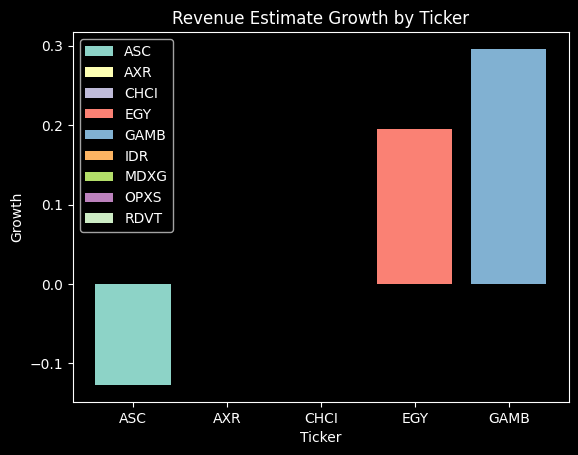

In [4]:
plot_growth_by_ticker(df)